In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [7]:
milk['average'] = milk.milk.values / milk.index.days_in_month

In [8]:
milk

,milk,average
month,,
1962-01-01,589,19.000000
1962-02-01,561,20.035714
1962-03-01,640,20.645161
1962-04-01,656,21.866667
1962-05-01,727,23.451613
...,...,...
1975-08-01,858,27.677419
1975-09-01,817,27.233333
1975-10-01,827,26.677419


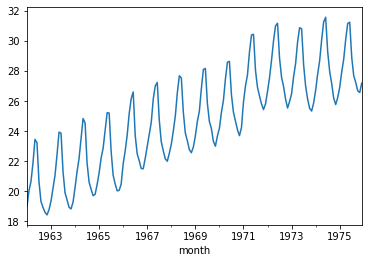

In [12]:
plt.figure()
milk['average'].plot()
plt.show()

In [14]:
milk.daily_diff1 = milk.average - milk.average.shift(1)

/Users/alina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [15]:
milk.daily_diff12 = milk.average - milk.average.shift(12)

/Users/alina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [16]:
import statsmodels.api as sm

In [17]:
sm.tsa.stattools.adfuller(milk.average)

(-1.1798216373266037,
 0.682215151308144,
 12,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 -1.5708067458066353)

In [30]:
sm.tsa.stattools.adfuller(milk.daily_diff1[1:])

(-2.7594694762289365,
 0.06430054654174293,
 11,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 -1.1539973381055688)

In [35]:
sm.tsa.stattools.adfuller(milk.daily_diff12[12:])

(-2.1594860932888076,
 0.22127672658830383,
 12,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -25.225679141303317)

In [36]:
milk.daily_diff2 = milk.daily_diff12 - milk.daily_diff12.shift(1)

/Users/alina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [41]:
sm.tsa.stattools.adfuller(milk.daily_diff2[13:])

(-5.481326334796932,
 2.2808455518036712e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -20.90513750989237)

In [42]:
import statsmodels.api as sm

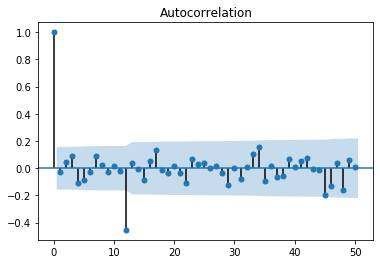

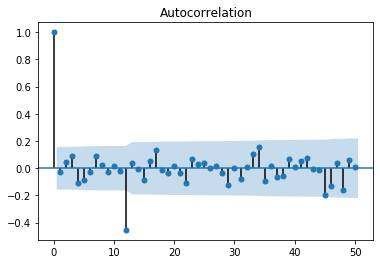

In [43]:
sm.graphics.tsa.plot_acf(milk.daily_diff2[13:].values.squeeze(), lags=50)

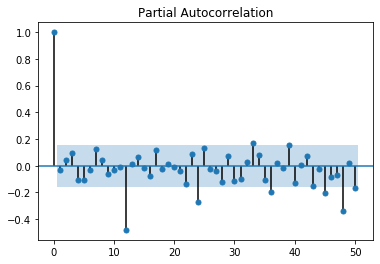

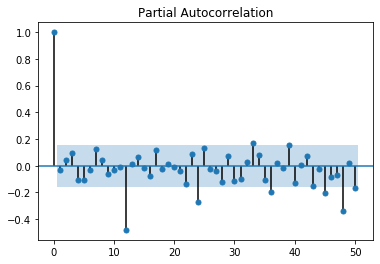

In [44]:
sm.graphics.tsa.plot_pacf(milk.daily_diff2[13:].values.squeeze(), lags=50)